<a href="https://colab.research.google.com/github/EjbejaranosAI/MAI-UPC/blob/main/MAI-UPC/CV/2021/image_operators_and_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory #01 : Image Operators and Filters

At the end of this laboratory, you would get familiarized with

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

### **Remember this is a graded exercise.**

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)


import numpy as np #needed to manage numerical arrays and matrices
from matplotlib import pyplot as plt #needed in order to display images and graphics
from skimage import data #needed in order to work with several presotred in skimage data
from skimage import exposure #the histogram is in this library
from skimage import filters # a lot of filters we will use are predefined, check it in https://scikit-image.org/docs/dev/api/skimage.filters.html
from skimage import io #we need it in order to read and store imahes
from skimage import morphology #morphology library has defined different 
from skimage.exposure import equalize_hist #To equalize histoghrams
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

![black_and_white_patches.png](https://drive.google.com/uc?export=view&id=1Iuf870gS6DuFzMtnXs53DLuiXy0oARaw)

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


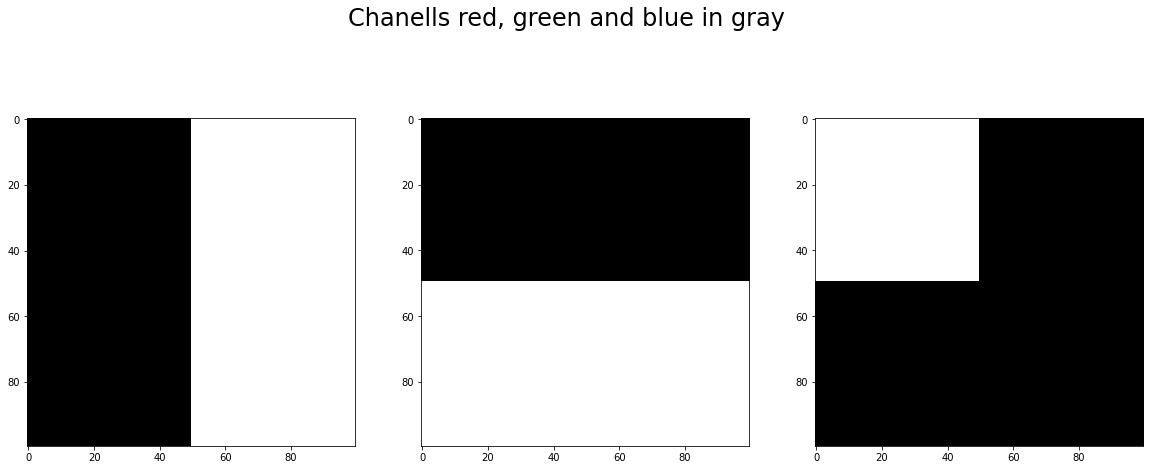

In [4]:
# solution
chanell_1 = np.zeros([100,100],dtype = np.uint8)
chanell_1[:,50:100] = 255  


chanell_2 = np.zeros([100,100], dtype=np.uint8)
chanell_2[50:100,:] = 255 


chanell_3 = np.zeros([100,100], dtype=np.uint8)
chanell_3[0:50,0:50] = 255

plt.figure(figsize=(20, 8))
plt.suptitle('Chanells red, green and blue in gray', size='24')
G = gridspec.GridSpec(1, 3)
#Picture No.1
axes_1 = plt.subplot(G[0,0])
plt.imshow(chanell_1, cmap="gray")
#Picture No.1
axes_1 = plt.subplot(G[0,1])
plt.imshow(chanell_2, cmap="gray")
#Picture No.1
axes_1 = plt.subplot(G[0,2])
plt.imshow(chanell_3, cmap="gray")
plt.show()


*   Use the above three images to create the following image

![color_patches.png](https://drive.google.com/uc?export=view&id=1UxmFHToC4TUjgtB7UQMbB3DM3RIZlgBZ)

*Hint: Remember channels and color spaces*

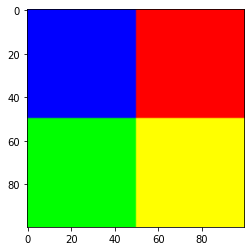

In [5]:
# solution

rubik = np.zeros([100,100,3], dtype=np.uint8)
rubik[:,:,0] = chanell_1
rubik[:,:,1] = chanell_2
rubik[:,:,2] = chanell_3
plt.imshow(rubik)
plt.show()

### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the  folder 'images'

![sillas.jpg](https://drive.google.com/uc?export=view&id=1Ged9FdDWIcipbNxNatGgCZyRdQvcGtoG)

*   Extract individual channels and plot them using the matplotlib subplots command.



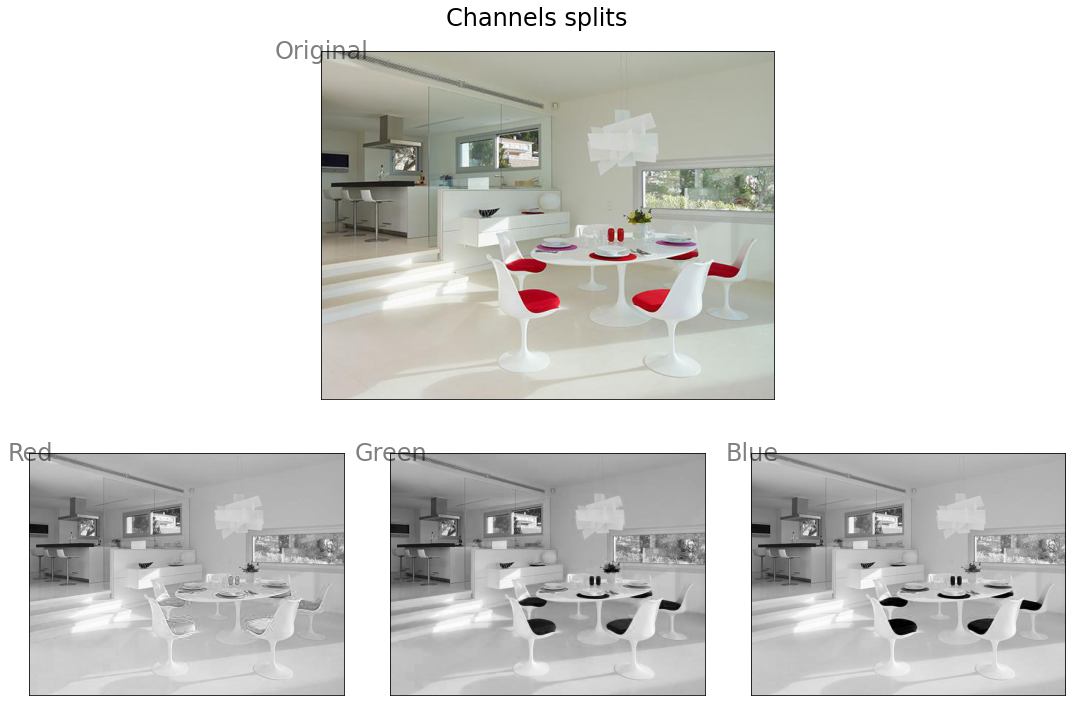

In [6]:
# solution
chairs = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab 2 Image Operators and Filters-20211013/images/sillas.jpg')
#Substrac all the chanells
chanell_red = chairs[:,:,0]
chanell_blue = chairs[:,:,1]
chanell_green = chairs[:,:,2]

#Proced to plot all the chanells with the original picture


plt.figure(figsize=(15, 15))
G = gridspec.GridSpec(3, 3)
plt.suptitle('Channels splits',size='24',y='1.02')
#Picture No.1
axes_1 = plt.subplot(G[0, :])
plt.xticks([])
plt.yticks([])
plt.imshow(chairs)
plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=24, alpha=.5)
#Picture No.2
axes_2 = plt.subplot(G[1, 0])
plt.xticks([])
plt.yticks([])
plt.imshow(chanell_red, cmap="gray")
plt.text(0.5, 0.5, 'Red', ha='center', va='center', size=24, alpha=.5)
#Picture No.3
axes_3 = plt.subplot(G[1, -2])
plt.xticks([])
plt.yticks([])
plt.imshow(chanell_green, cmap="gray")
plt.text(0.5, 0.5, 'Green', ha='center', va='center', size=24, alpha=.5)
#Picture No.4
axes_4 = plt.subplot(G[1, -1])
plt.xticks([])
plt.yticks([])
plt.imshow(chanell_blue, cmap="gray")
plt.text(0.5, 0.5, 'Blue', ha='center', va='center', size=24, alpha=.5)


plt.tight_layout()
plt.show()

*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using  the matplotlib subplots command.

476 618 3


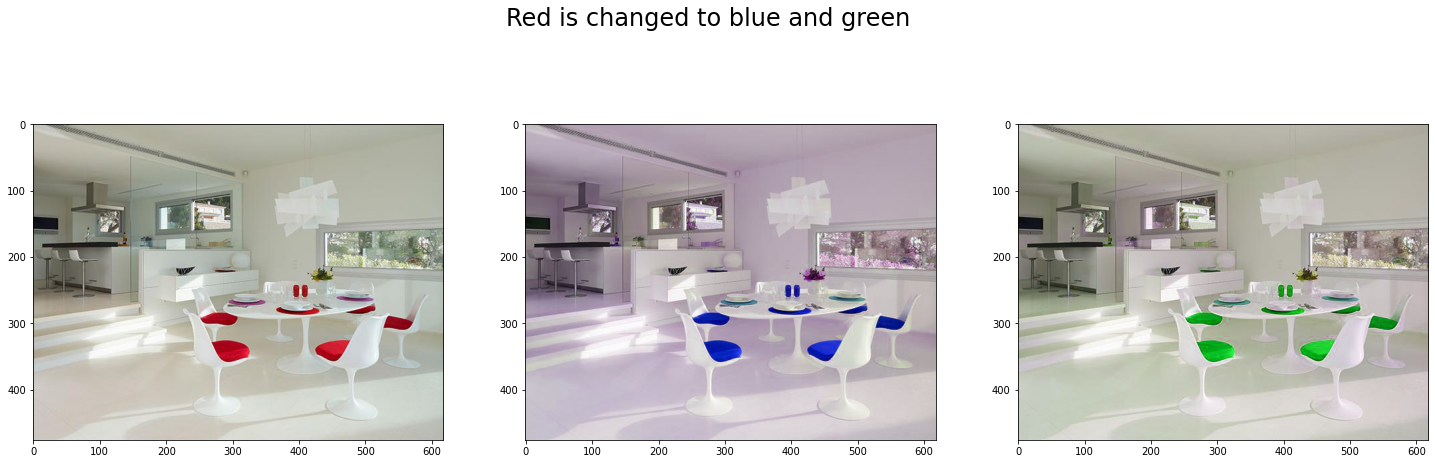

In [9]:
# solution
x = len(chairs[:,1,1])
y = len(chairs[1,:,1])
z = len(chairs[1,1,:])

print(x,y,z)
chairs_green = np.zeros([x,y,z],dtype=np.uint8)
chairs_green[:,:,1] = chanell_red 
chairs_green[:,:,0] = chanell_blue 
chairs_green[:,:,2] = chanell_green

chairs_blue = np.zeros([x,y,z],dtype=np.uint8)
chairs_blue[:,:,2] = chanell_red 
chairs_blue[:,:,0] = chanell_blue 
chairs_blue[:,:,1] = chanell_green


chanells_sub, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(25,8))
chanells_sub.suptitle( 'Red is changed to blue and green', fontsize=24)
ax1.imshow(chairs, cmap="gray")
ax2.imshow(chairs_blue, cmap="gray")
ax3.imshow(chairs_green, cmap="gray")
plt.show()


# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think how to apply image masks!!!*

![model_and_coat.png](https://drive.google.com/uc?export=view&id=1DOieJOrfwe34z0-3EEBVyX1Ac45sb5SN)


In [10]:
# We proceed to read all the images from the MyDrive 
coat = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab 2 Image Operators and Filters-20211013/images/coat.png')
model = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab 2 Image Operators and Filters-20211013/images/model.png')
aqua = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab 2 Image Operators and Filters-20211013/images/aquatermi_lowcontrast.jpg')
texture = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab 2 Image Operators and Filters-20211013/images/texture.png')
texture2 = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab 2 Image Operators and Filters-20211013/images/texture2.png')
texture3 = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab 2 Image Operators and Filters-20211013/images/texture3.jpg')


In [11]:
#Solution No.1
coat_R = coat[:,:,0]
coat_G = coat[:,:,1]
coat_B = coat[:,:,2]
coat_alpha = coat[:,:,3]

texture_R = texture[:,:,0]
texture_G = texture[:,:,1]
texture_B = texture[:,:,2]

print(texture.shape)
print(coat.shape)

h = len(coat[:,1,1])
w = len(coat[1,:,1])
# We creating the mask. In this part we only capture the pixels differents to 0, with this we forget the background and we can obtain the shape of the coat.
mask = (coat_R != 0) & (coat_G != 0) & (coat_B != 0) 
zs = np.zeros([len(coat[:,1,1]),len(coat[1,:,1])],dtype = np.uint8)
masked_coat_alpha = np.where(mask, coat_alpha, zs)

#Resize images to do match with the coat image

#Texture1
textureOne  = np.concatenate((texture,texture,texture,texture,texture,texture,texture))
textureOne = np.concatenate((textureOne,textureOne,textureOne,textureOne),axis=1)
textureOne = textureOne[0:h,0:w,:]   
#Texture2
textureTwo  = np.concatenate((texture2,texture2,texture2,texture2,texture2,texture2,texture2))
textureTwo = np.concatenate((textureTwo,textureTwo,textureTwo,textureTwo),axis=1)
textureTwo = textureTwo[0:h,0:w,:]   
#Texture3
textureThree  = np.concatenate((texture3,texture3,texture3,texture3,texture3,texture3,texture3))
textureThree = np.concatenate((textureThree,textureThree,textureThree,textureThree),axis=1)
textureThree = textureThree[0:h,0:w,:]   

#We create a copy from the coat to overlaping the different textures
coat_masked = np.copy(coat)
coat_masked0 = np.copy(coat)
coat_masked1 = np.copy(coat)
coat_masked2 = np.copy(coat)
coat_masked3 = np.copy(coat)

#coat without textures
coat_masked[:,:,3] = masked_coat_alpha
#coat with texture one
coat_masked1[:,:,0] = textureOne[:,:,0]
coat_masked1[:,:,1] = textureOne[:,:,1]
coat_masked1[:,:,2] = textureOne[:,:,2]
coat_masked1[:,:,3] = masked_coat_alpha
#coat with texture two
coat_masked2[:,:,0] = textureTwo[:,:,0]
coat_masked2[:,:,1] = textureTwo[:,:,1]
coat_masked2[:,:,2] = textureTwo[:,:,2]
coat_masked2[:,:,3] = masked_coat_alpha
#coat with texture three
coat_masked3[:,:,0] = textureThree[:,:,0]
coat_masked3[:,:,1] = textureThree[:,:,1]
coat_masked3[:,:,2] = textureThree[:,:,2]
coat_masked3[:,:,3] = masked_coat_alpha


(183, 275, 3)
(1188, 915, 4)


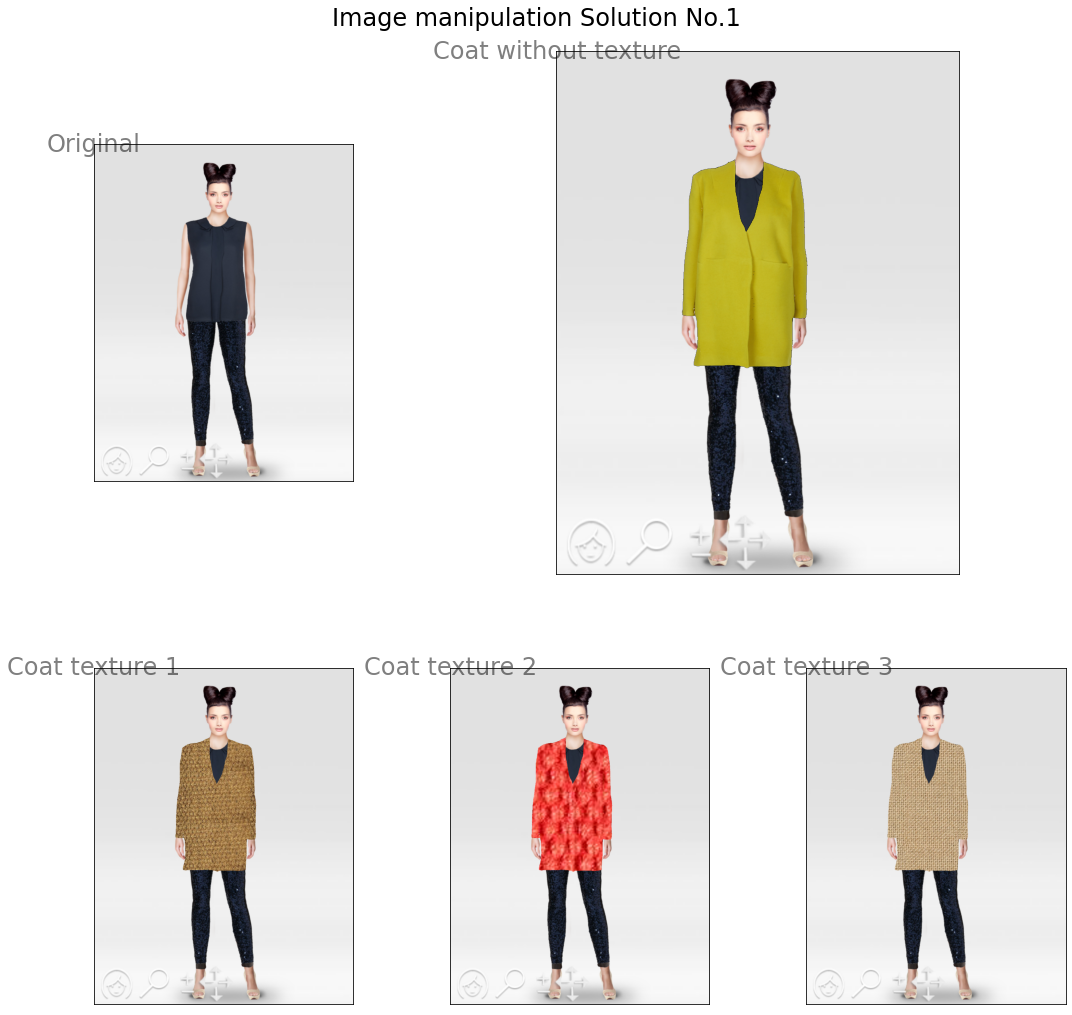

In [12]:
#Plot Solution No.1
plt.figure(figsize=(15, 15))
plt.suptitle('Image manipulation Solution No.1', size='24',y=1.02)
G = gridspec.GridSpec(2, 3)
#Picture No.1
axes_1 = plt.subplot(G[0, :1])
plt.xticks([])
plt.yticks([])
plt.imshow(model)
plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=24, alpha=.5)
#Picture No.2
axes_2 = plt.subplot(G[0, 1:])
plt.xticks([])
plt.yticks([])
plt.imshow(model)
plt.imshow(coat_masked)
plt.text(0.5, 0.5, 'Coat without texture', ha='center', va='center', size=24, alpha=.5)
#Picture No.3
axes_3 = plt.subplot(G[1, 0])
plt.xticks([])
plt.yticks([])
plt.imshow(model)
plt.imshow(coat_masked1)
plt.text(0.5, 0.5, 'Coat texture 1', ha='center', va='center', size=24, alpha=.5)
#Picture No.4
axes_4 = plt.subplot(G[1, 1])
plt.xticks([])
plt.yticks([])
plt.imshow(model)
plt.imshow(coat_masked2)
plt.text(0.5, 0.5, 'Coat texture 2', ha='center', va='center', size=24, alpha=.5)
#Picture No.5
axes_4 = plt.subplot(G[1, 2])
plt.xticks([])
plt.yticks([])
plt.imshow(model)
plt.imshow(coat_masked3)
plt.text(0.5, 0.5, 'Coat texture 3', ha='center', va='center', size=24, alpha=.5)

plt.tight_layout()
plt.show()

In [13]:
# solution No.2 
chl_1_coat = coat[:,:,0]
chl_2_coat = coat[:,:,1]
chl_3_coat = coat[:,:,2]
chl_4_coat = coat[:,:,3]

chl_1_model = model[:,:,0]
chl_2_model = model[:,:,1]
chl_3_model = model[:,:,2]
chl_4_model = model[:,:,3]

background = 0
mask = (chl_1_coat != background) & (chl_2_coat != background) & (chl_3_coat != background) 


model_dreased = np.copy(model)
model_txt1 = np.copy(model)
model_txt2 = np.copy(model)
coat_texture = np.copy(coat)

text = np.concatenate((texture,texture,texture,texture))
text1 = np.concatenate((text,text,text,text),axis=1)

text_2 = np.concatenate((texture2,texture2,texture2,texture2))
text2 = np.concatenate((text_2,text_2,text_2,text_2),axis=1)


for i,x in enumerate(mask): # overlaying images on the existing ones
  for j,y in enumerate(x):
    if y == True:
      model_dreased[i,j,:] = coat[i,j,:]
      coat_texture[i,j,:3] = text1[i,j,:]
      model_txt1[i,j,:] = coat_texture[i,j,:]
      coat_texture[i,j,:3] = text2[i,j,:]
      model_txt2[i,j,:] = coat_texture[i,j,:]


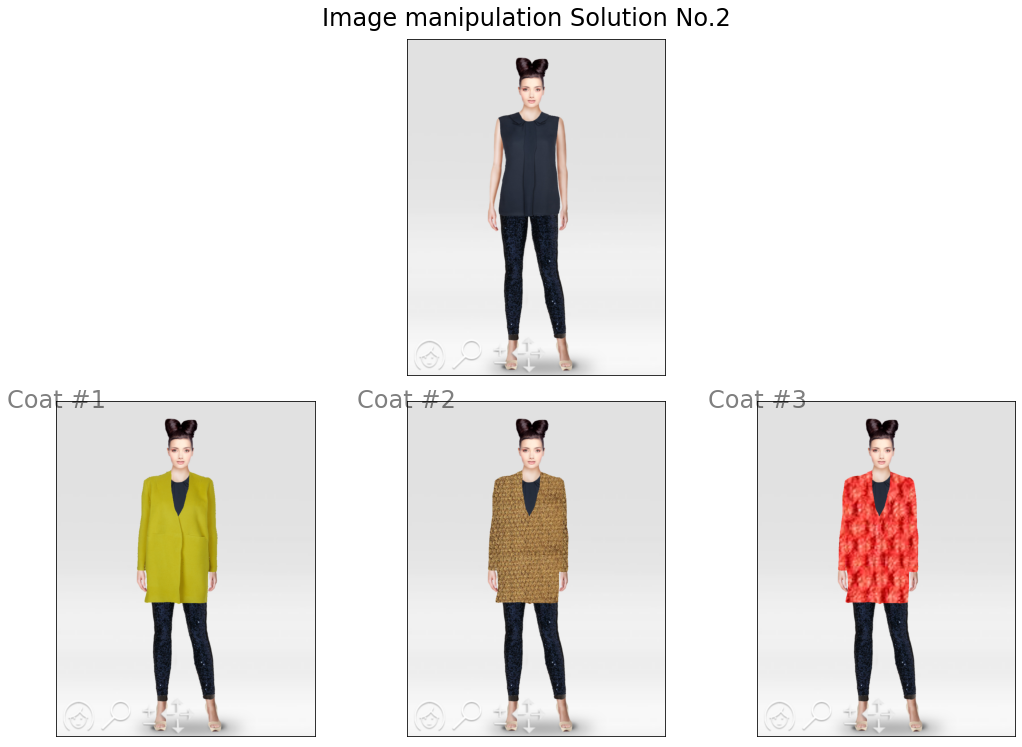

In [14]:
#Plot Solution No.2
plt.figure(figsize=(15, 15))
plt.suptitle('Image manipulation Solution No.2', size='24',y=1.02)
G = gridspec.GridSpec(3, 3)
#Picture No.1
axes_1 = plt.subplot(G[0, :])
plt.xticks([])
plt.yticks([])
plt.imshow(model)
#plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=24, alpha=.5)
#Picture No.2
axes_2 = plt.subplot(G[1, 0])
plt.xticks([])
plt.yticks([])
plt.imshow(model_dreased)
plt.text(0.5, 0.5, 'Coat #1', ha='center', va='center', size=24, alpha=.5)
#Picture No.3
axes_3 = plt.subplot(G[1, -2])
plt.xticks([])
plt.yticks([])
plt.imshow(model_txt1)
plt.text(0.5, 0.5, 'Coat #2', ha='center', va='center', size=24, alpha=.5)
#Picture No.4
axes_4 = plt.subplot(G[1, -1])
plt.xticks([])
plt.yticks([])
plt.imshow(model_txt2)
plt.text(0.5, 0.5, 'Coat #3', ha='center', va='center', size=24, alpha=.5)


plt.tight_layout()
plt.show()

# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




In [15]:
# solution

from skimage import data
from skimage.color import rgb2gray

# We proceed to read the astronaut image form data module
Astronaut = data.astronaut()
# Later we convert the image of the astronaut to grayscale.
grayscale = rgb2gray(Astronaut)



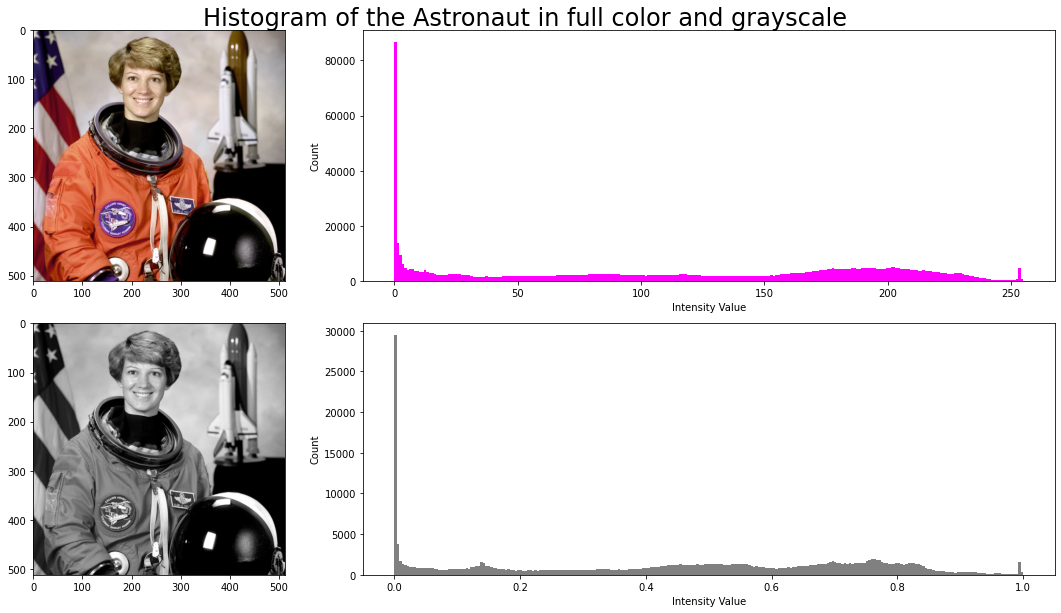

In [16]:
#Plot 
plt.figure(figsize=(15, 12))
plt.suptitle('Histogram of the Astronaut in full color and grayscale',y='1.01', size='24')

G = gridspec.GridSpec(3, 3)

#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(Astronaut)
#plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=20, alpha=.5)

#Picture No.2
axes_2 = plt.subplot(G[1, 0])
plt.imshow(grayscale, cmap='gray')
#plt.text(0.5, 0.5, 'Gray Scale', ha='center', va='center', size=20, alpha=.5)

#Picture No.3
axes_3 = plt.subplot(G[0, 1:])
# We Compute the histogram of the image.
plt.hist(Astronaut.ravel(), bins = 256, color='magenta')
#plt.text(0.5, 0.5, 'Histogram Original', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')

#Picture No.4
axes_4 = plt.subplot(G[1, 1:])
# We Compute the histogram of the image.
plt.hist(grayscale.ravel(), bins = 256, color='gray')
#plt.text(0.5, 0.5, 'Histogram gray scale', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')


plt.tight_layout()

plt.show()



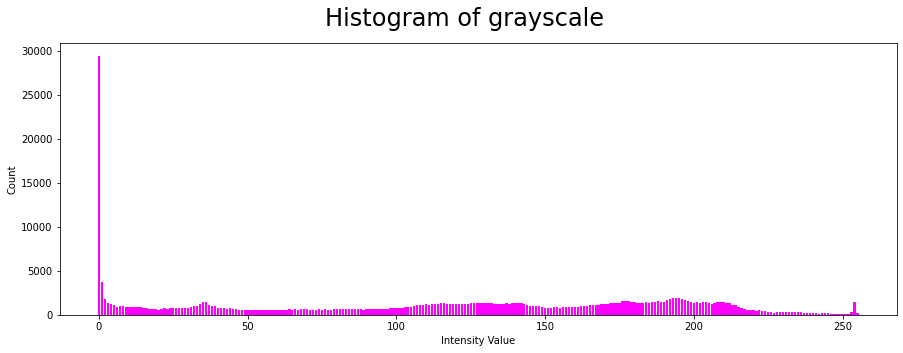

In [17]:
# Another way to compute the histogram from the image is:
plt.figure(figsize=(15, 5))
plt.suptitle('Histogram of grayscale', size='24')
h = np.zeros(256)
for pixel in 255 * grayscale.ravel():
  h[pixel.astype('int')]+=1
#Plot the histogram
g = np.arange(256)
plt.bar(g,h,color='magenta')
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.show()


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using the matplotlib plot command and the matplotlib bar command..

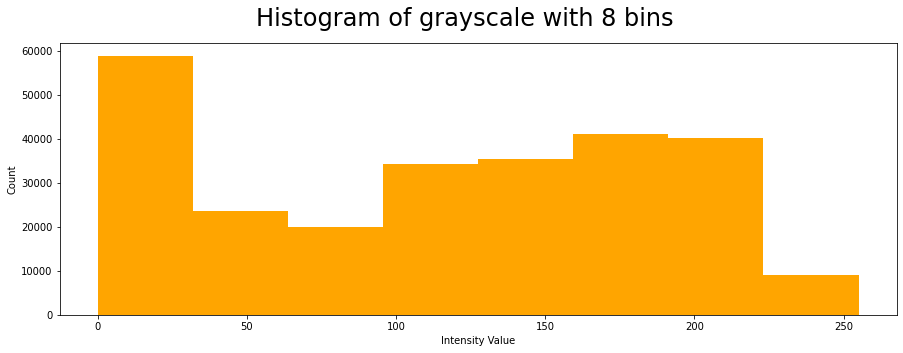

In [18]:
# solution
hist_8_bins = plt.figure(figsize=(15, 5))
hist_8_bins = plt.suptitle('Histogram of grayscale with 8 bins', size='24')
hist_8_bins=plt.hist(255*grayscale.ravel(),bins=8, range=(0,255),color='orange')
hist_8_bins= plt.xlabel('Intensity Value')
hist_8_bins = plt.ylabel('Count')




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



**Solution**

When we change the bin count we can observe that the intensity range is split into the same number of partitions as we have indicated in the "bin count" variable.

For smaller bin count values, we can loose some details about how the pixels are distributed. However, in some contexts it can be beneficial to have a smaller bin count since it can allow us to identify more easily which are the regions with more or less intensity. 

There is not a certain correct value for the bin count. However, we can estimate a suitable number depending on our goals with the image analysis.

For example, when we declare a low bin count we can obtain a more generalized view of the features of the image, and with that we can identify if the image has low contrast or high contrast, among others. At the same, we could also recognise if it would be neccesary to apply an equalization technique.

On the other hand, when we apply a high bin count we can obtain a great amount of detail about the intensity values, obtaining specific information about the amount of pixels that have a certain intensity value so that we can identify where exactly is the maximum or minimum amount of pixels. By defining greater bin count values, we can deduce if an image needs an improved contrast.
...

*   Compute the histogram of the color image (without converting it to grayscale).
*   Plot the total histogram as well as the histogram for each channel (show them  with the corresponding titles for each histogram).


The shape of the image is:  (512, 512, 3)


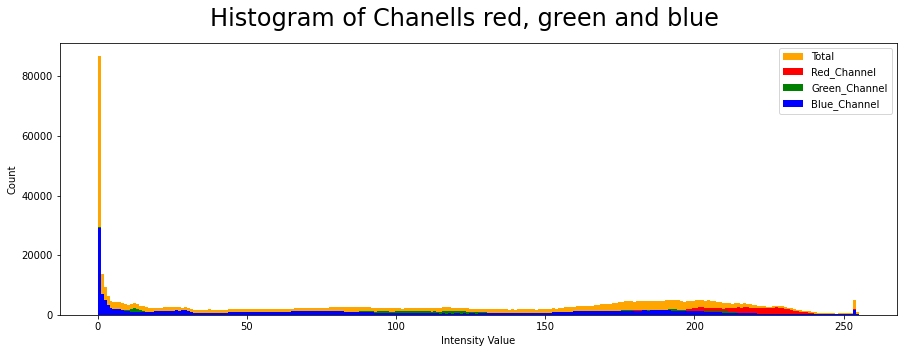

In [19]:
#solution no1
print('The shape of the image is: ',Astronaut.shape)
histcolor = plt.figure(figsize=(15, 5))
histcolor= plt.suptitle('Histogram of Chanells red, green and blue', size='24')
histcolor = plt.hist(Astronaut.ravel(),bins=256, color='orange')
histcolor = plt.hist(Astronaut[:,:,0].ravel(), bins=256, color = 'red')
histcolor = plt.hist(Astronaut[:,:,1].ravel(), bins=256, color = 'green')
histcolor = plt.hist(Astronaut[:,:,2].ravel(), bins=256, color = 'blue')
histcolor= plt.xlabel('Intensity Value')
histcolor = plt.ylabel('Count')
histcolor = plt.legend(['Total', 'Red_Channel', 'Green_Channel', 'Blue_Channel'])


### **Exercise: Histogram Equalization**

*   Read 'aquatermi_lowcontrast.jpg' image from the images folder.
*   Compute the histogram of the image.
*   Perform histogram equalization of the image to enhance the contrast. *Hint: Use equalize_hist function available in skimage.exposure*
*   Also compute histogram of the equalized image.
*   Use 2 x 2 subplot to show the original image and the enhanced image along with the corresponding histograms.



In [20]:
# solution
#To equialize an image in terms of histogram, called histogram equalization, is to change the image in a way to make its histogram values 
# as equal posiible

## To do histogram equalization
image = io.imread('/content/drive/MyDrive/MAI/CV/2021/Lab_CV/Lab 2 Image Operators and Filters-20211013/images/aquatermi_lowcontrast.jpg')
from skimage.exposure import equalize_hist
image_eq = equalize_hist(image)



/usr/local/lib/python3.7/dist-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


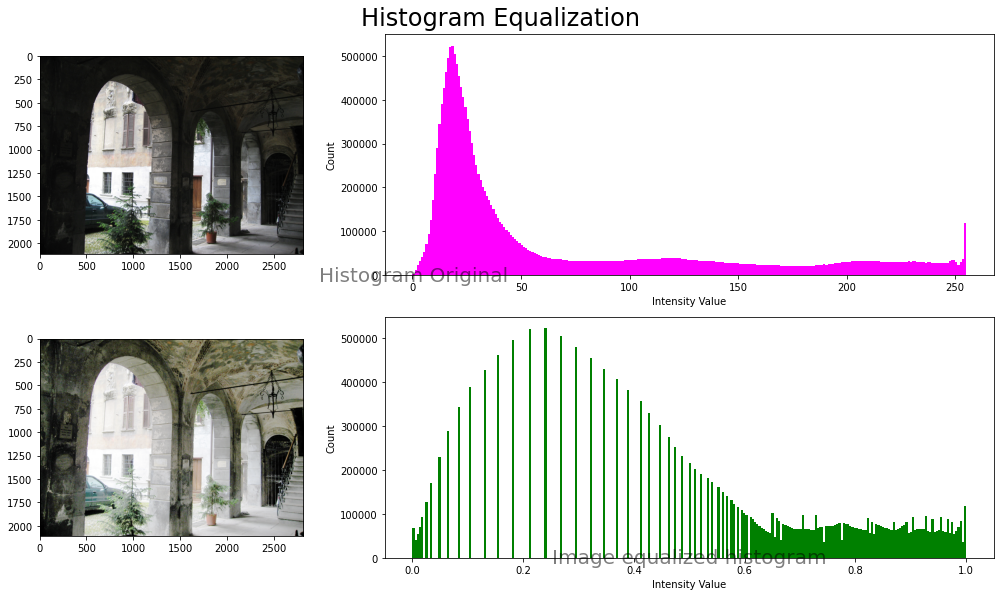

In [21]:
#Plot 
plt.figure(figsize=(14, 8))
plt.suptitle('Histogram Equalization', size='24', y='1.03')
G = gridspec.GridSpec(2, 3)
#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.imshow(image)
#plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=20, alpha=.5)
#Picture No.2
axes_2 = plt.subplot(G[1, 0])
plt.imshow(image_eq, cmap='gray')
#plt.text(0.5, 0.5, 'Gray Scale', ha='center', va='center', size=20, alpha=.5)
#Picture No.3
axes_3 = plt.subplot(G[0, 1:])
# We Compute the histogram of the image.
plt.hist(image.ravel(), bins = 256, color='magenta')
plt.text(0.5, 0.5, 'Histogram Original', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')
#Picture No.4
axes_4 = plt.subplot(G[1,1: ])
# We Compute the histogram of the image.
plt.hist(image_eq.ravel(), color = 'green', bins = 256)
plt.text(0.5, 0.5, 'Image equalized histogram', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')


plt.tight_layout()
plt.show()

Histogram Equalization is particularyl useful in cases where both backgrounds and foregrounds are both bright or dark. Histogram Equalization can lead to better views of bone structure in x-ray images, and to better detail in over-exposed or under-exposed photos. A quintessential advantage of Histogram Equalization method is that it is a fairly straight forward image processing technique.


*   The above function in skimage.exposure uses cumulative distribution function and interpolation technique to normalize the histogram. How is it different from linear contrast stretch (contrast enhancement - see theory slides)?


**Solution**

The Equalization technique transforms the intensity values in such a way that the resulting image shows improved contrast among different regions. This technique is a non-linear normalization that stretches the area of the histogram with high abundance intensities and compresses the area with low abundance intensities, thus resulting in a scale of more distributed contrasts. Due to this non-linearity this technique can allow for a more eavenly spread overall intensity, therefore enabling us to observe more details in areas where there were prominent peaks in their intenisty.

On other hand, the Linear Contrast Stretch or Contrast Enhancement attempts to reach a similar goal but from a simpler linear approach. With this technique, the intensity range of the pixels can be extended in order to increase the difference between the maximun and the minimun intensity values present in the image.

...

### **Exercise: Linear Contrast Stretch**

*   Write a function to compute the linear contrast stretch or contrast enhancement (Do not use an inbuilt function). 
*   Provide grayscale image array and the bin count as parameters to the function and return the enhanced image array.
*   Use a 2 x 2 plot to visualize the original image, histogram, enhanced image and the corresponding histogram.



Maximun value in the image 197
Minimun value in the image 10


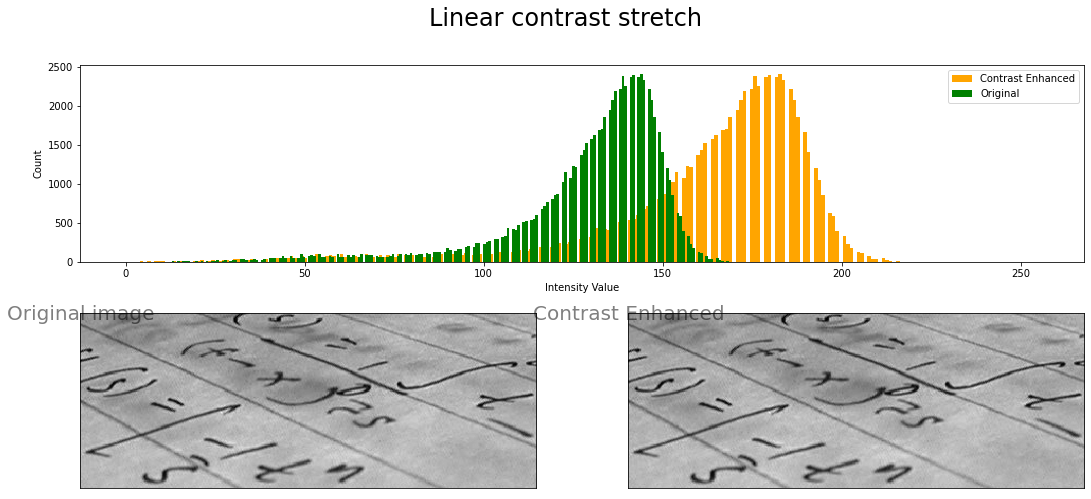

In [22]:
#ImgOriginal = io.imread('/content/drive/MyDrive/MAI/CV/2021/lab_2/P1 Linear filters-20211005/images/lowContrast5.png')
ImgOriginal = data.text()

Img_gray = rgb2gray(ImgOriginal)
Img_eq = equalize_hist(Img_gray)
binCount=(256)

def ContrastEnhancement(ImgOriginal,binCount):
  minK = np.amin(ImgOriginal.ravel())
  maxK = np.amax(ImgOriginal.ravel())
  print('Maximun value in the image',maxK)
  print('Minimun value in the image',minK)
  quantk = (255)

  # Contrast enhancement formula
  ImgOut = ((ImgOriginal-minK)/(maxK-minK)*quantk)
  
  #plt.imshow(ContrastEnhancement,cmap=plt.cm.gray)
  plt.figure(figsize=(18, 8))
  plt.suptitle('Linear Contrast Enhancement', size='24')
  G = gridspec.GridSpec(2, 2)
  #Histograms overlayed
  axes_1 = plt.subplot(G[0, :])
  hist_Contrast_Enh = plt.hist(ImgOut.ravel(),color = 'orange', bins = binCount)
  hist_gray = plt.hist(ImgOriginal.ravel(),color = 'green', bins = binCount)
  plt.xlabel('Intensity Value')
  plt.ylabel('Count')
  histcolor = plt.legend(['Contrast Enhanced', 'Original'])
  #Original Image
  axes_1 = plt.subplot(G[1, 0])
  plt.imshow(ImgOriginal, cmap='gray')
  plt.text(0.5, 0.5, 'Original image', ha='center', va='center', size=20, alpha=.5)
  plt.xticks([])
  plt.yticks([])
  #Contrast Enhanced Image
  axes_1 = plt.subplot(G[1, 1])
  plt.imshow(ImgOut, cmap='gray')
  plt.text(0.5, 0.5, 'Contrast Enhanced', ha='center', va='center', size=20, alpha=.5)
  plt.xticks([])
  plt.yticks([])

  return ImgOut

# Call the function
EnhancedImage = ContrastEnhancement(ImgOriginal,binCount)

In the top image, we can appreciate both histograms overlayed on top of each other in order to better appreciate the result when the Contrast Enhancement technique is used. As it can be observed, the intensity range of the resulting image is distributed among all the spectrum.

For the sake of comparison of the two techniques, in the next part we can see the original image, followed by the image resulting from the Contrast Enhancement algorithm and finally the image resulting from the Equalization, as well as the corresponding histograms.

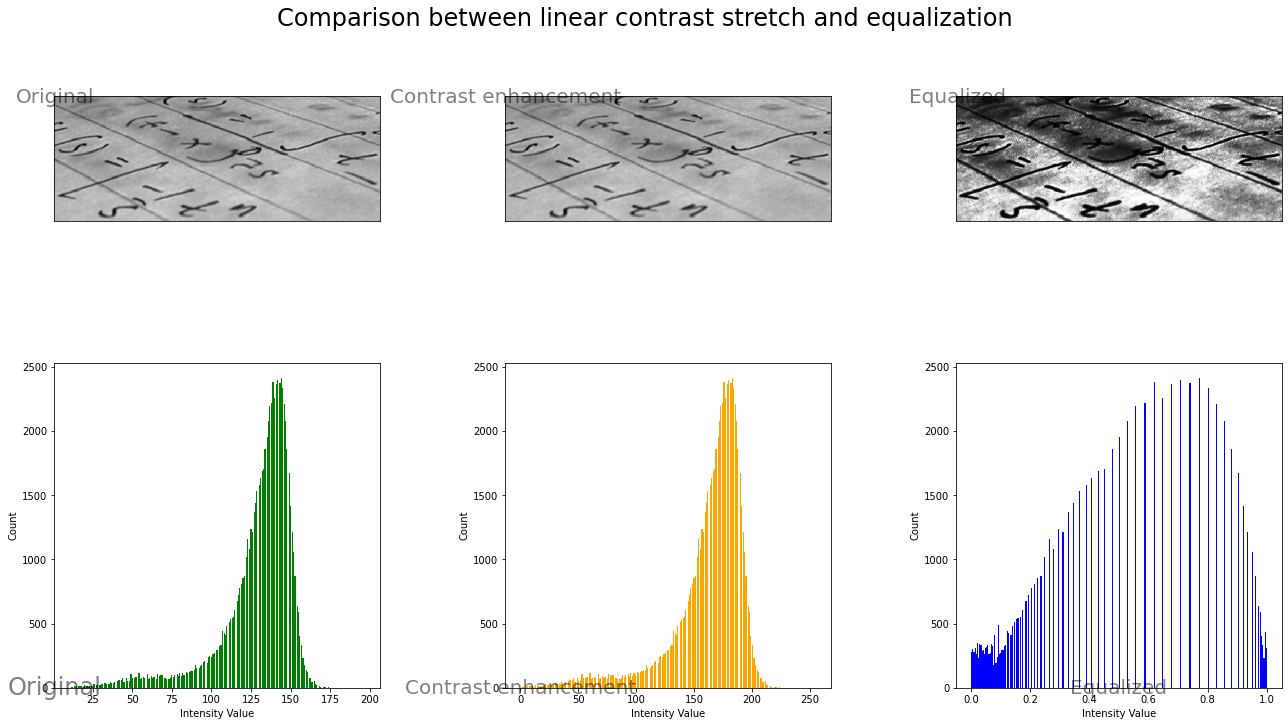

In [25]:
plt.figure(figsize=(18, 15))
plt.suptitle('Comparison between Linear Contrast Enhancement and Equalization', size='24')
G = gridspec.GridSpec(3, 3)

#Picture No.1
axes_1 = plt.subplot(G[0, 0])
plt.xticks([])  
plt.yticks([])
plt.imshow(ImgOriginal, cmap=plt.cm.gray)
plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=20, alpha=.5)

#Picture No.2
axes_2 = plt.subplot(G[0, 1])
plt.xticks([])
plt.yticks([])
plt.imshow(EnhancedImage, cmap=plt.cm.gray)
plt.text(0.5, 0.5, 'Contrast enhancement', ha='center', va='center', size=20, alpha=.5)

#Picture No.3
axes_3 = plt.subplot(G[0, 2])
plt.xticks([])
plt.yticks([])
plt.imshow(Img_eq, cmap=plt.cm.gray)
plt.text(0.5, 0.5, 'Equalized', ha='center', va='center', size=20, alpha=.5)

#Picture No.4O
axes_4 = plt.subplot(G[1, 0])
plt.hist(ImgOriginal.ravel(),color = 'green', bins = 256)
plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=24, alpha=.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')

#Picture No.5
axes_3 = plt.subplot(G[1, 1])
plt.hist(EnhancedImage.ravel(),color = 'Orange', bins = 256)
plt.text(0.5, 0.5, 'Contrast enhancement', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')

#Picture No.6
axes_3 = plt.subplot(G[1, 2])
plt.hist(Img_eq.ravel(),color = 'blue', bins = 256)
plt.text(0.5, 0.5, 'Equalized', ha='center', va='center', size=20, alpha=.5)
plt.xlabel('Intensity Value')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# Filters

### **Exercise: Mean Filter**

*   Load the **coins** image from the data module.
*   Define a disk structuring element (command selem) of radius 20. *Hint: Structuring elements (command selem) are defined in the skimage.morphology module*
*   Use mean filter using the created selem. *Hint: The mean filter is available in skimage.filters.rank module*
*   Increase the radius of the selem by 10 and apply the mean filter.
*   Reduce the radius of the selem by 10 and apply the mean filter.
*   Visualize all the smoothened images along with the original image.




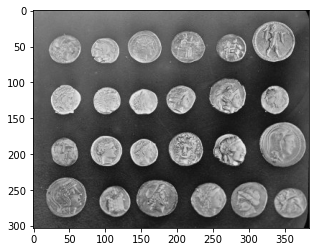

In [26]:
# solution
coins = data.coins()
coins_eq = equalize_hist(coins)
plt.imshow(coins, cmap ='gray')
radius = (20,30,20)
selem1 =morphology.selem.disk(radius[0])
selem2 =morphology.selem.disk(radius[1])
selem3 =morphology.selem.disk(radius[2])

coins1 = filters.rank.mean(coins,selem=selem1)
coins2 = filters.rank.mean(coins1,selem=selem2)
coins3 = filters.rank.mean(coins2,selem=selem3)


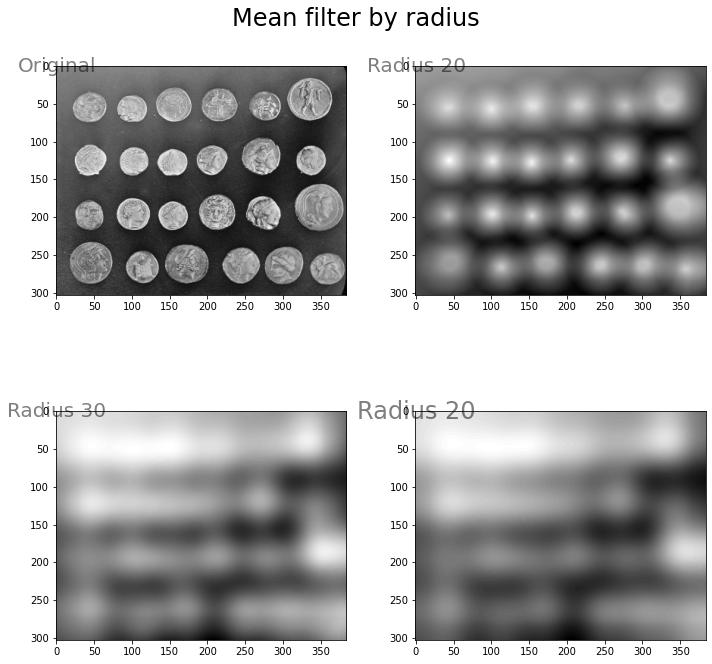

In [27]:
plt.figure(figsize=(10, 10))
G = gridspec.GridSpec(2, 2)
plt.suptitle('Mean filter by radius', size='24')
#Picture No.1
axes_1 = plt.subplot(G[0, 0])

plt.imshow(coins, cmap ='gray')
plt.text(0.5, 0.5, 'Original', ha='center', va='center', size=20, alpha=.5)
#Picture No.2
axes_2 = plt.subplot(G[0, 1])

plt.imshow(coins1, cmap ='gray')
plt.text(0.5, 0.5, 'Radius 20', ha='center', va='center', size=20, alpha=.5)
#Picture No.3
axes_3 = plt.subplot(G[1, 0])

plt.imshow(coins2, cmap ='gray')
plt.text(0.5, 0.5, 'Radius 30', ha='center', va='center', size=20, alpha=.5)
#Picture No.4
axes_4 = plt.subplot(G[1, 1])
plt.imshow(coins3, cmap ='gray')
plt.text(0.5, 0.5, 'Radius 20', ha='center', va='center', size=24, alpha=.5)


plt.tight_layout()
plt.show()

*   Use different selem (square, rectangle, star, diamond) to view the behaviour of the mean filter (It is not necessary to repeat with different sizes; it is sufficient to show the one with optimal parameter).
*   Create a 2 x n subplot to show the selem in the first row and the corresponding smoothened image in the second row.

In [28]:
# solution

width = 20
height = 30
selem1 = morphology.selem.disk(20)
selem2 = morphology.selem.square(width)
selem3 = morphology.selem.rectangle(width, height)
selem4 = morphology.selem.star(30)
selem5 = morphology.selem.diamond(30)

coins1 = filters.rank.mean(coins, selem = selem1)
coins2 = filters.rank.mean(coins, selem = selem2)
coins3 = filters.rank.mean(coins, selem = selem3)
coins4 = filters.rank.mean(coins, selem = selem4)
coins5 = filters.rank.mean(coins, selem = selem5)

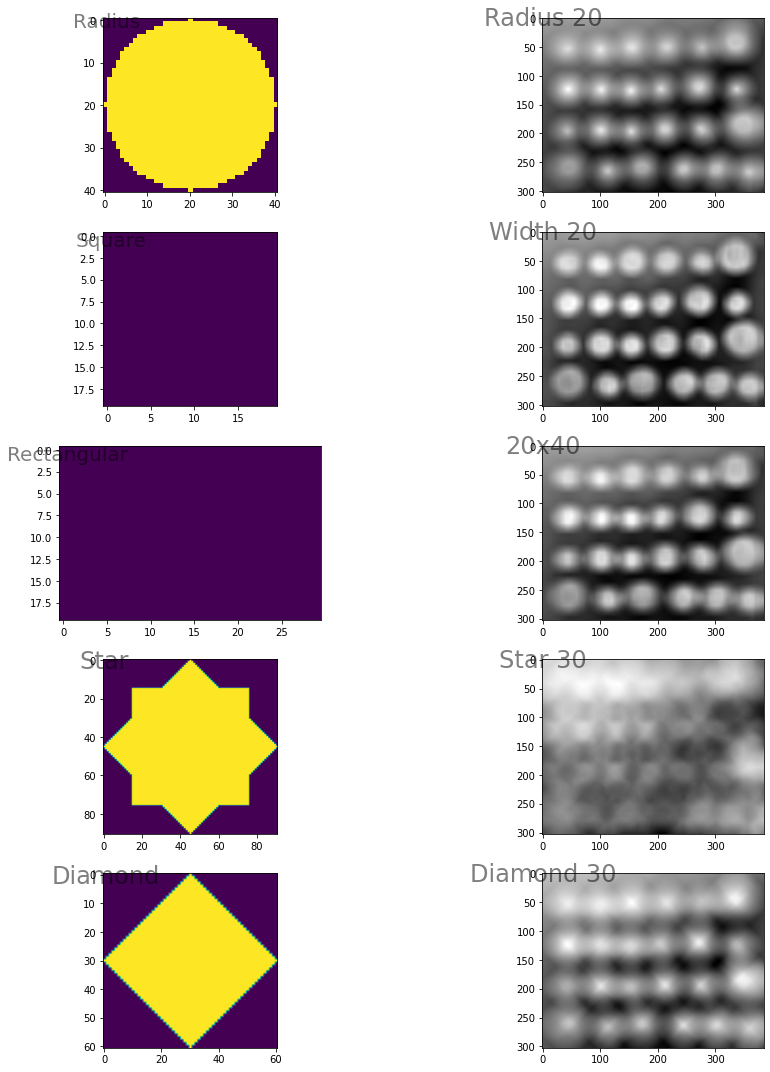

In [29]:
plt.figure(figsize=(15, 15))
G = gridspec.GridSpec(5, 2)
#Picture No.1
axes_1 = plt.subplot(G[0, 0])

plt.imshow(selem1)
plt.text(0.5, 0.5, 'Radius', ha='center', va='center', size=20, alpha=.5)
#Picture No.2
axes_2 = plt.subplot(G[1, 0])

plt.imshow(selem2)
plt.text(0.5, 0.5, 'Square', ha='center', va='center', size=20, alpha=.5)
#Picture No.3
axes_3 = plt.subplot(G[2, 0])

plt.imshow(selem3)
plt.text(0.5, 0.5, 'Rectangular', ha='center', va='center', size=20, alpha=.5)
#Picture No.4
axes_4 = plt.subplot(G[3, 0])
plt.imshow(selem4)
plt.text(0.5, 0.5, 'Star', ha='center', va='center', size=24, alpha=.5)

#Picture No.5
axes_4 = plt.subplot(G[4, 0])
plt.imshow(selem5)
plt.text(0.5, 0.5, 'Diamond', ha='center', va='center', size=24, alpha=.5)

#Picture No.6
axes_4 = plt.subplot(G[0, 1])
plt.imshow(coins1, cmap ='gray')
plt.text(0.5, 0.5, 'Radius 20', ha='center', va='center', size=24, alpha=.5)

#Picture No.7
axes_4 = plt.subplot(G[1, 1])
plt.imshow(coins2, cmap ='gray')
plt.text(0.5, 0.5, 'Width 20', ha='center', va='center', size=24, alpha=.5)

#Picture No.8
axes_4 = plt.subplot(G[2, 1])
plt.imshow(coins3, cmap ='gray')
plt.text(0.5, 0.5, '20x40', ha='center', va='center', size=24, alpha=.5)

#Picture No.9
axes_4 = plt.subplot(G[3, 1])
plt.imshow(coins4, cmap ='gray')
plt.text(0.5, 0.5, 'Star 30', ha='center', va='center', size=24, alpha=.5)

#Picture No.10
axes_4 = plt.subplot(G[4, 1])
plt.imshow(coins5, cmap ='gray')
plt.text(0.5, 0.5, 'Diamond 30', ha='center', va='center', size=24, alpha=.5)

plt.tight_layout()
plt.show()

*   How does changing the radius of disk affect the smoothing functionality?

**Solution**

When we change the radius of the disk to greater, we ovserve that the smoothing functionality blurs the image more, causing the original outline of the shapes to be lost.

...

  * What is the observed behaviour with different structuring element?



**Solution**

We can observe that with a correct structural element we can more easily identify the objects in the image. In this case we can observe that when we use a disk with a small radius of a square it is better than using other shapes.

Also, for the diamond and the star we can see that the diamond seems to perform better for this specific example, and we could even say, that the diamond seems as good (if not better) than the result obtained with the circle of comparable size.

...



*   What is the difference between mean filter and gaussian filter?




**Solution**

The first difference we can find is that the Gaussian filter is a non-linear filter while the Mean Filter is determined by the mean of the pixel values. The median replaces the pixel intensity of the central pixel and this is used to eliminate noise when this makes the image blurry.

The Gaussian filter is similar to the Mean filter, however, it involves a weighted average of the surrounding pixels and has a sigma parameter.

While the Gaussian filter blurs the edges of an image (like the median filter), it preserves the edges better than a similarly sized Mean filter.
...


---

## **End of P1: Image operators and filters**

Deadline for P1 submission in CampusVirtual is: **Monday, the 18th of October, 2021**
